Getting started with the linear advection model
=============================================================

Author: Philipp Griewank

Basic starting point to get to know the linear advection model. More documentation to come here, but for now this is your starting point to understanding the model and it's core features


## ToDo

## Done


In [32]:
import numpy as np
from da_functions import *
from model_functions import *
from plot_functions import *
import matplotlib.pyplot as plt

## Run the model 

In [20]:
"""
initialize model and data assimilation setup using the default values
"""

m_const = set_model_constants()#u=2.3,nx=101)#,u_std=1.5)#,dx=1,u=1,u_std=0,dhdt=0,dhdt_std = 0,h_init_std = 50)
da_const = set_da_constants()#nens=100,ncyc=60,nexp=1)#,u_std=0.01)#,obs_loc_h = np.arange(0,11))
#nens=10,dt = 50)

In [3]:
states = run_linear_advection_EnKF(m_const,da_const)

## Plot the first 5 timesteps

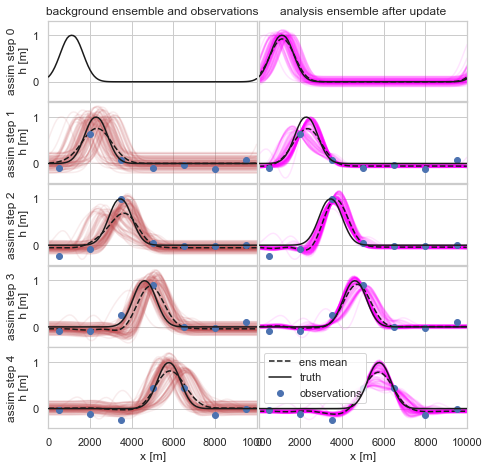

In [4]:
fig, ax = ensemble_plotter(states,m_const,da_const,t_start=0,t_end=5)


## Compute and plot RMSE and ensemble spread 

In [5]:
"""
Compute scores 
"""
rmse, spread = get_spread_and_rmse(states,da_const,m_const)

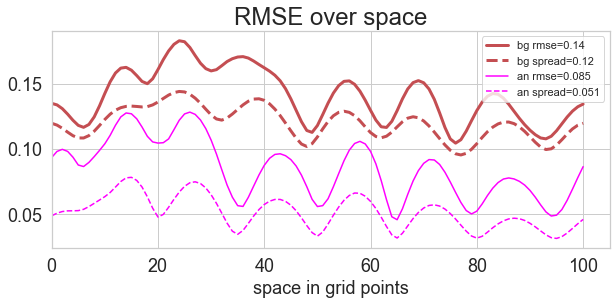

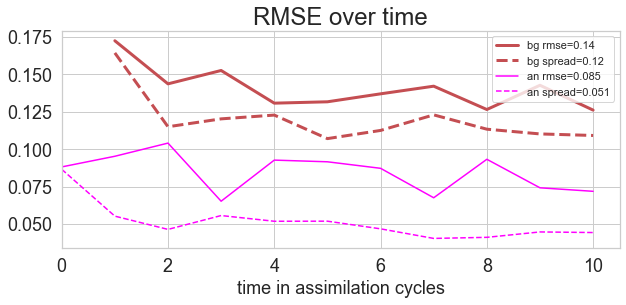

In [6]:
"""
plot RMSE over time and over space
"""
f = plot_scores_spread(rmse,spread)

## Adding a blind forecast and calculating a response function

In [7]:
states = add_blind_forecast(states,m_const,da_const)

In [8]:
def sum_mid_tri(x):
    nx = len(x)
    idx_str = int(nx/3.)
    idx_end = int(2*nx/3.)
    return np.sum(x[idx_str:idx_end])

In [9]:
states = add_response(states,sum_mid_tri)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='assimilation step', ylabel='PDF of response function J'>)

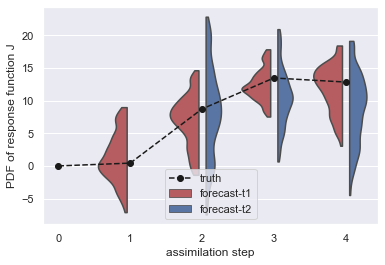

In [10]:
plot_response_function_pdf_split(states,t_end = 5,right_var='bf')

## Compute and plot RMSE and ensemble spread with blind forecast as well

In [11]:
"""
Compute scores 
"""
rmse, spread = get_spread_and_rmse(states,da_const,m_const)

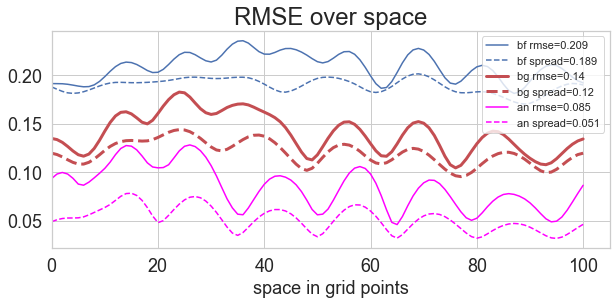

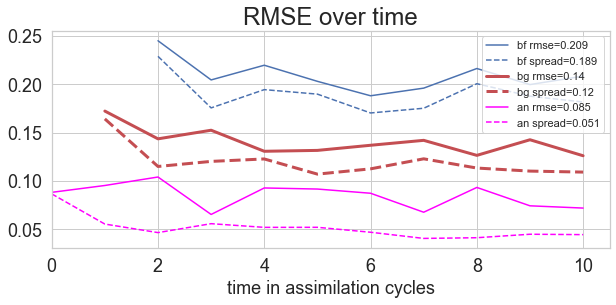

In [12]:
"""
plot RMSE over time and over space
"""
f = plot_scores_spread(rmse,spread)

## Variance reduction, with lots more cycles 


In [23]:
da_const['ncyc'] = 1000

In [24]:
states = run_linear_advection_EnKF(m_const,da_const)

In [25]:
states = add_blind_forecast(states,m_const,da_const)

In [26]:
states = add_response(states,sum_mid_tri)

In [27]:
var_red_est,var_red_ind,var_red =var_reduction_estimate(states,m_const,da_const)

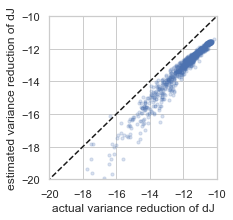

In [28]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
plt.scatter(var_red,var_red_est,alpha=0.2,s=10)
plt.xlim(-20,-10)
plt.ylim(-20,-10)
#plt.xticks([-15,-10,-5,0])
#plt.yticks([-15,-10,-5,0])
plt.plot([-40,0],[-40,0],'k--')
plt.xlabel('actual variance reduction of dJ')
plt.ylabel('estimated variance reduction of dJ')
sns.set_style("whitegrid")

## Plotting some covariance matrices for fun

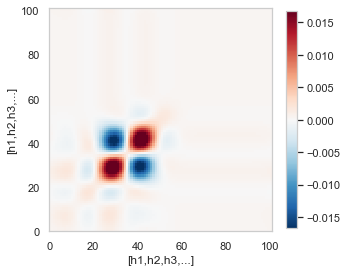

In [29]:
fig, ax = B_plotter(states,ncyc=2,matrix="an")

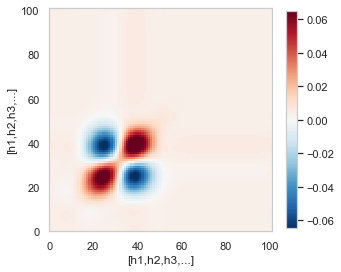

In [30]:
fig, ax = B_plotter(states,ncyc=2,matrix="bg")

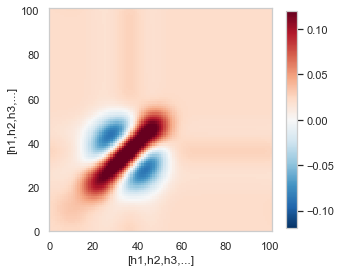

In [31]:
fig, ax = B_plotter(states,ncyc=2,matrix="bf")